In [36]:
import matplotlib as mpl
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from retrospective_analysis.metrics import max_error, mean_difference
from retrospective_analysis.data_loading import load_dataframe, moving_average, add_baselines
from retrospective_analysis.evaluate_scenarios import compute_metrics, compute_metrics_all_scenarios, evaluate_all_scenarios

In [37]:
# to change with path suited for you 
results_path = 'results/'
images_path = 'images/'

# divide by 100 to express as % of normalization
new_hosp_normalization = 4200/100 
icu_normalization = 7000/100 

metrics = {"MAE": mean_absolute_error, "ME": mean_difference,  
           "Max Error": max_error}

data_location = {"2020/04/29": "https://raw.githubusercontent.com/evaluation-modelisation-covid/france/gh-pages/paper_models/data/2020_04_29/corrected_scenarios.csv",
        "2020/10/30": "processed_data/2020_10_30.csv",
        "2021/01/16": "processed_data/2021_01_16.csv",
        "2021/02/02": "processed_data/2021_02_02.csv",
        "2021/02/08": "processed_data/2021_02_08.csv",
        "2021/02/23": "processed_data/2021_02_23.csv",
        "2021/04/26": "processed_data/2021_04_26.csv",
        "2021/05/21": "processed_data/2021_05_21.csv",
        "2021/07/26": "processed_data/2021_07_26.csv",
        "2021/08/05": "processed_data/2021_08_05.csv",
        "2021/10/04": "processed_data/2021_10_04.csv",
        "2022/01/07": "processed_data/2022_01_07.csv"}

normalizations = {"2020/04/29": icu_normalization,
        "2020/10/30": icu_normalization,
        "2021/01/16": new_hosp_normalization,
        "2021/02/02": new_hosp_normalization,
        "2021/02/08": new_hosp_normalization,
        "2021/02/23": new_hosp_normalization,
        "2021/04/26": new_hosp_normalization,
        "2021/05/21": new_hosp_normalization,
        "2021/07/26": icu_normalization,
        "2021/08/05": icu_normalization,
        "2021/10/04": icu_normalization,
        "2022/01/07": icu_normalization}

In [35]:
# Set matplotlib style 
mpl.use("pgf")
mpl.rcParams.update({
    'font.family': 'serif',
    'axes.titlesize' : 25,
    'axes.labelsize' : 19,
    'legend.fontsize' : 18,
    'pgf.rcfonts': False,
    'figure.dpi': 300.0,
})

mpl.rcParams['axes.unicode_minus'] = False
sns.set(font_scale=1.5, style="white", 
        rc={
            'font.family': 'sans-serif',
            'axes.titlesize' : 25,
            'axes.labelsize' : 22,
            'legend.fontsize' : 15,
            'xtick.labelsize' : 17,
            'ytick.labelsize' : 17,
            'xtick.bottom': True,
            'ytick.left': True,
            'figure.dpi': 300.0,
})
%matplotlib inline

In [20]:
df_low_scenario = compute_metrics_all_scenarios(data_location)

print(df_low_scenario.to_latex(
    formatters={"name": str.upper},
    float_format="{:.1f}".format)) 

In [22]:
df_median_scenario = compute_metrics_all_scenarios(data_location, scenario_name="median")

print(df_median_scenario.to_latex(
    formatters={"name": str.upper},
    float_format="{:.1f}".format)) 

In [24]:
df_high_scenario = compute_metrics_all_scenarios(data_location, metrics=metrics, scenario_name="high")

print(df_high_scenario.to_latex(
    formatters={"name": str.upper},
    float_format="{:.1f}".format)) 

/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_17987/2242519157.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bottom=0)
/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_17987/2242519157.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bottom=0)
/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_17987/2242519157.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bottom=0)


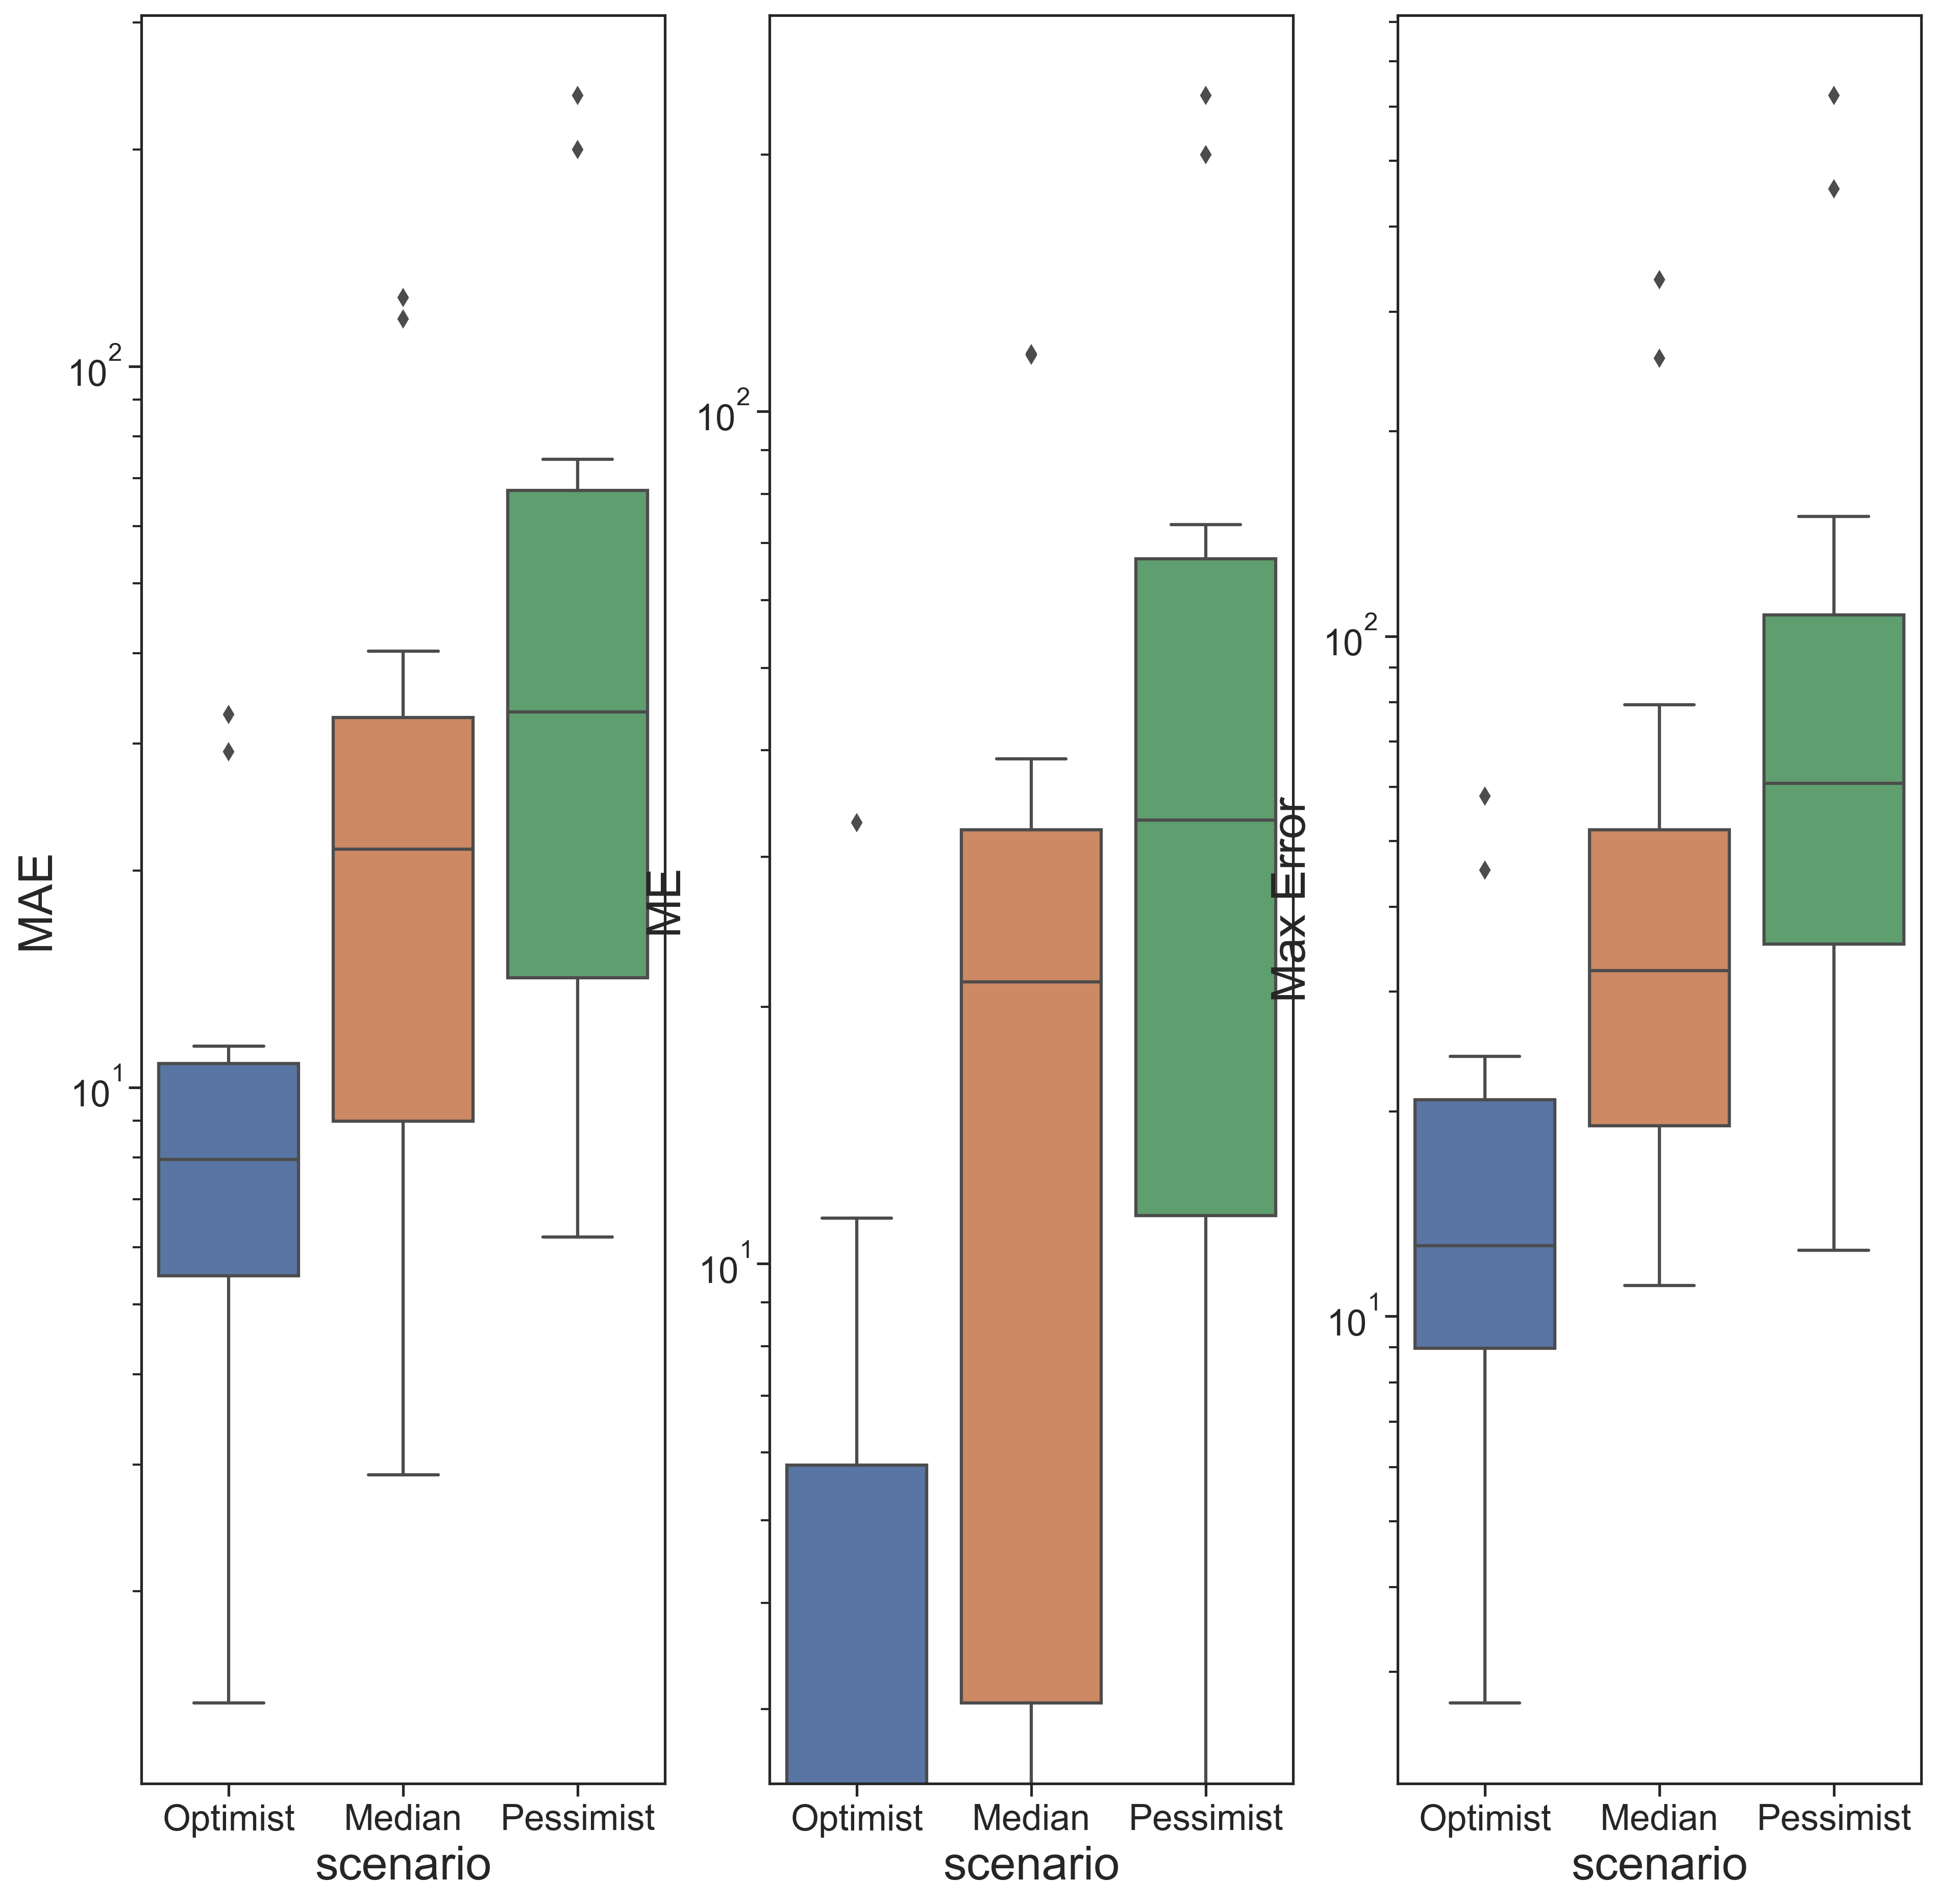

In [27]:
display_df = pd.concat([df_low_scenario.assign(scenario='Optimist'), df_median_scenario.assign(scenario='Median'),
                        df_high_scenario.assign(scenario='Pessimist')], axis=0)

endpoints = ["MAE", "ME", "Max Error"]
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 15))

for i, ax in enumerate(axes.flat):
    h = sns.boxplot(data=display_df, y=endpoints[i], x="scenario", ax=ax)
    h.set_yscale("log")
    ax.set_ylim(bottom=0)
    
fig_path = images_path + '/average_uncertainty.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')